In [ ]:
import os
os.chdir('../')
os.getcwd()

Importamos Librerias

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns 
sns.set()
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# graficos incrustados
%matplotlib inline

Funcion para despliegue grafico multiple

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

Cambio al directorio donde tengo el dataset

Leo el dataset   csv con separador = ";"

In [4]:
Bank_Full = pd.read_csv("./data/bankMarketing/01 - inicial/bank-additional-full.csv",sep=';')

Utilizamos la función head() para poder mostrar los primeros 5 registros. A la función le podemos pasar el número de filas que deseamos observar, *head(10)*, es decir, observaremos las primeras 10 filas. La función tail, nos realiza lo mismo, pero mostrándonos las últimas 5 filas. También podemos definir la cantidad de filas a mostrar pasándole el número.

In [5]:
Bank_Full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
Bank_Full.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

In [7]:
Bank_Full.tail(10)

age          job   marital            education default housing loan  \
41178   62      retired   married    university.degree      no      no   no   
41179   64      retired  divorced  professional.course      no     yes   no   
41180   36       admin.   married    university.degree      no      no   no   
41181   37       admin.   married    university.degree      no     yes   no   
41182   29   unemployed    single             basic.4y      no     yes   no   
41183   73      retired   married  professional.course      no     yes   no   
41184   46  blue-collar   married  professional.course      no      no   no   
41185   56      retired   married    university.degree      no     yes   no   
41186   44   technician   married  professional.course      no      no   no   
41187   74      retired   married  professional.course      no     yes   no   

        contact month day_of_week  duration  campaign  pdays  previous  \
41178  cellular   nov         thu       483         2      6         3   
41179  cellular   nov         fri       151         3    999         0   
41180  cellular   nov         fri       254         2    999         0   
41181  cellular   nov         fri       281         1    999         0   
41182  cellular   nov         fri       112         1      9         1   
41183  cellular   nov         fri       334         1    999         0   
41184  cellular   nov         fri       383         1    999         0   
41185  cellular   nov         fri       189         2    999         0   
41186  cellular   nov         fri       442         1    999         0   
41187  cellular   nov         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41178      success          -1.1          94.767          -50.8      1.031   
41179  nonexistent          -1.1          94.767          -50.8      1.028   
41180  nonexistent          -1.1          94.767          -50.8      1.028   
41181  nonexistent          -1.1          94.767          -50.8      1.028   
41182      success          -1.1          94.767          -50.8      1.028   
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
41178       4963.6  yes  
41179       4963.6   no  
41180       4963.6   no  
41181       4963.6  yes  
41182       4963.6   no  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no

Vamos a ver la cantidad de filtas y columnas que posee la base de datos

In [8]:
Bank_Full.shape

(41188, 21)

Para poder realizar una descripción estadística de la base (equivalente a summary de R) es la función *describe()*

In [9]:
Bank_Full.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

Vamos a buscar valores faltantes de la siguiente forma:

In [10]:
Bank_Full.isna().sum().sort_values(ascending=False)

y                 0
day_of_week       0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
duration          0
nr.employed       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
age               0
dtype: int64

In [11]:
Adquirieron = ["no", "yes"]
for x in Adquirieron:
    print("Adquirieron {}".format(x))
    print(Bank_Full[(~Bank_Full.age.isna()) & (Bank_Full.y == x)]\
            .agg({"age":["mean", "median"]}))

Adquirieron no
              age
mean    39.911185
median  38.000000
Adquirieron yes
              age
mean    40.913147
median  37.000000


In [12]:
Bank_Full["Adquirieron"] = np.where(Bank_Full.y == "yes", 1, 0)
Bank_Full["Rechazaron"] = np.where(Bank_Full.y == "no", 1, 0)

Vemos que la campaña tiene mayor aceptación para los Estudiantes y Jubilados

In [13]:
sumarizada = Bank_Full.groupby(["job"]).agg({"Adquirieron":["sum"], "Rechazaron":["sum"]})\
            .reset_index()
sumarizada.columns = ["Tipo Empleo", "Adquirieron", "Rechazaron"]
sumarizada["ratio"] = sumarizada["Adquirieron"] / (sumarizada["Adquirieron"]+sumarizada["Rechazaron"])
sumarizada.sort_values("ratio",ascending=False)

Tipo Empleo  Adquirieron  Rechazaron     ratio
8         student          275         600  0.314286
5         retired          434        1286  0.252326
10     unemployed          144         870  0.142012
0          admin.         1352        9070  0.129726
4      management          328        2596  0.112175
11        unknown           37         293  0.112121
9      technician          730        6013  0.108260
6   self-employed          149        1272  0.104856
3       housemaid          106         954  0.100000
2    entrepreneur          124        1332  0.085165
7        services          323        3646  0.081381
1     blue-collar          638        8616  0.068943

[Text(0, 0, 'student'),
 Text(1, 0, 'retired'),
 Text(2, 0, 'unemployed'),
 Text(3, 0, 'admin.'),
 Text(4, 0, 'management'),
 Text(5, 0, 'unknown'),
 Text(6, 0, 'technician'),
 Text(7, 0, 'self-employed'),
 Text(8, 0, 'housemaid'),
 Text(9, 0, 'entrepreneur'),
 Text(10, 0, 'services'),
 Text(11, 0, 'blue-collar')]

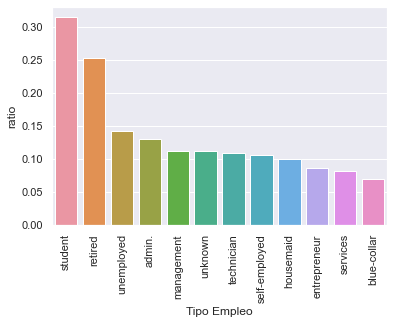

In [14]:
chart = sns.barplot(x="Tipo Empleo", y="ratio", 
                    data=sumarizada.sort_values("ratio",ascending=False))

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

Analizo los que adquierieron algún producto previamente

In [15]:
sumarizadaProd = Bank_Full.groupby(["poutcome"]).agg({"Adquirieron":["sum"], "Rechazaron":["sum"]})\
            .reset_index()
sumarizadaProd.columns = ["Adquirieron Productos Previamente", "Adquirieron", "Rechazaron"]
sumarizadaProd["ratio"] = sumarizadaProd["Adquirieron"] / (sumarizadaProd["Adquirieron"]+sumarizadaProd["Rechazaron"])
sumarizadaProd.sort_values("ratio",ascending=False)

Adquirieron Productos Previamente  Adquirieron  Rechazaron     ratio
2                           success          894         479  0.651129
0                           failure          605        3647  0.142286
1                       nonexistent         3141       32422  0.088322

Analisis conbinando el tipo de empleo y si adquierió un producto previamente

In [16]:
combinado = Bank_Full.groupby(["job","poutcome"]).agg({"Adquirieron":["sum"], "Rechazaron":["sum"]})\
            .reset_index()
combinado.columns = ["Tipo Empleo","Adquirieron Productos Previamente", "Adquirieron", "Rechazaron"]
combinado["ratio"] = combinado["Adquirieron"] / (combinado["Adquirieron"]+combinado["Rechazaron"])
combinado.sort_values("ratio",ascending=False)

Tipo Empleo Adquirieron Productos Previamente  Adquirieron  Rechazaron  \
17        retired                           success          117          41   
26        student                           success           84          34   
11      housemaid                           success           27          11   
14     management                           success           66          29   
2          admin.                           success          286         142   
32     unemployed                           success           41          21   
29     technician                           success          139          72   
23       services                           success           42          28   
20  self-employed                           success           16          14   
33        unknown                           failure            9           9   
5     blue-collar                           success           59          60   
8    entrepreneur                           success           11          14   
35        unknown                           success            6          13   
15        retired                           failure           63         167   
24        student                           failure           43         120   
25        student                       nonexistent          148         446   
30     unemployed                           failure           19          75   
16        retired                       nonexistent          254        1078   
27     technician                           failure          110         508   
9       housemaid                           failure           12          62   
0          admin.                           failure          165         926   
12     management                           failure           43         288   
18  self-employed                           failure           18         127   
1          admin.                       nonexistent          901        8002   
31     unemployed                       nonexistent           84         774   
21       services                           failure           42         406   
19  self-employed                       nonexistent          115        1131   
13     management                       nonexistent          219        2279   
28     technician                       nonexistent          481        5433   
7    entrepreneur                       nonexistent          102        1175   
3     blue-collar                           failure           70         816   
34        unknown                       nonexistent           22         271   
6    entrepreneur                           failure           11         143   
10      housemaid                       nonexistent           67         881   
22       services                       nonexistent          239        3212   
4     blue-collar                       nonexistent          509        7740   

       ratio  
17  0.740506  
26  0.711864  
11  0.710526  
14  0.694737  
2   0.668224  
32  0.661290  
29  0.658768  
23  0.600000  
20  0.533333  
33  0.500000  
5   0.495798  
8   0.440000  
35  0.315789  
15  0.273913  
24  0.263804  
25  0.249158  
30  0.202128  
16  0.190691  
27  0.177994  
9   0.162162  
0   0.151237  
12  0.129909  
18  0.124138  
1   0.101202  
31  0.097902  
21  0.093750  
19  0.092295  
13  0.087670  
28  0.081332  
7   0.079875  
3   0.079007  
34  0.075085  
6   0.071429  
10  0.070675  
22  0.069255  
4   0.061704

<AxesSubplot:>

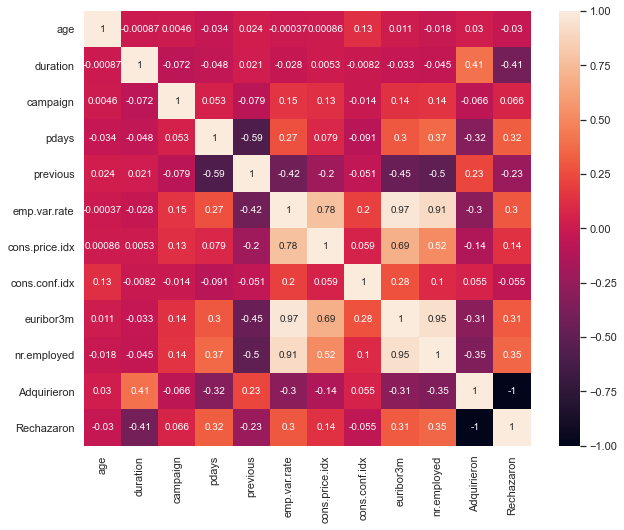

In [17]:
# Defining plot sizes
plt.figure(figsize = (10, 8))

# Creating correlation matrix
corr_mat = Bank_Full.drop(columns=["y"]).corr()

# Plotting the matrix
sns.heatmap(corr_mat, xticklabels = corr_mat.columns, yticklabels = corr_mat.columns, annot=True)

creo un df con target = "yes"

In [18]:
df_cliente_deposito = Bank_Full[Bank_Full["y"]=="yes"]

In [19]:
df_cliente_deposito.head()

age           job   marital            education  default housing loan  \
75    41   blue-collar  divorced             basic.4y  unknown     yes   no   
83    49  entrepreneur   married    university.degree  unknown     yes   no   
88    49    technician   married             basic.9y       no      no   no   
129   41    technician   married  professional.course  unknown     yes   no   
139   45   blue-collar   married             basic.9y  unknown     yes   no   

       contact month day_of_week  duration  campaign  pdays  previous  \
75   telephone   may         mon      1575         1    999         0   
83   telephone   may         mon      1042         1    999         0   
88   telephone   may         mon      1467         1    999         0   
129  telephone   may         mon       579         1    999         0   
139  telephone   may         mon       461         1    999         0   

        poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
75   nonexistent           1.1          93.994          -36.4      4.857   
83   nonexistent           1.1          93.994          -36.4      4.857   
88   nonexistent           1.1          93.994          -36.4      4.857   
129  nonexistent           1.1          93.994          -36.4      4.857   
139  nonexistent           1.1          93.994          -36.4      4.857   

     nr.employed    y  Adquirieron  Rechazaron  
75        5191.0  yes            1           0  
83        5191.0  yes            1           0  
88        5191.0  yes            1           0  
129       5191.0  yes            1           0  
139       5191.0  yes            1           0

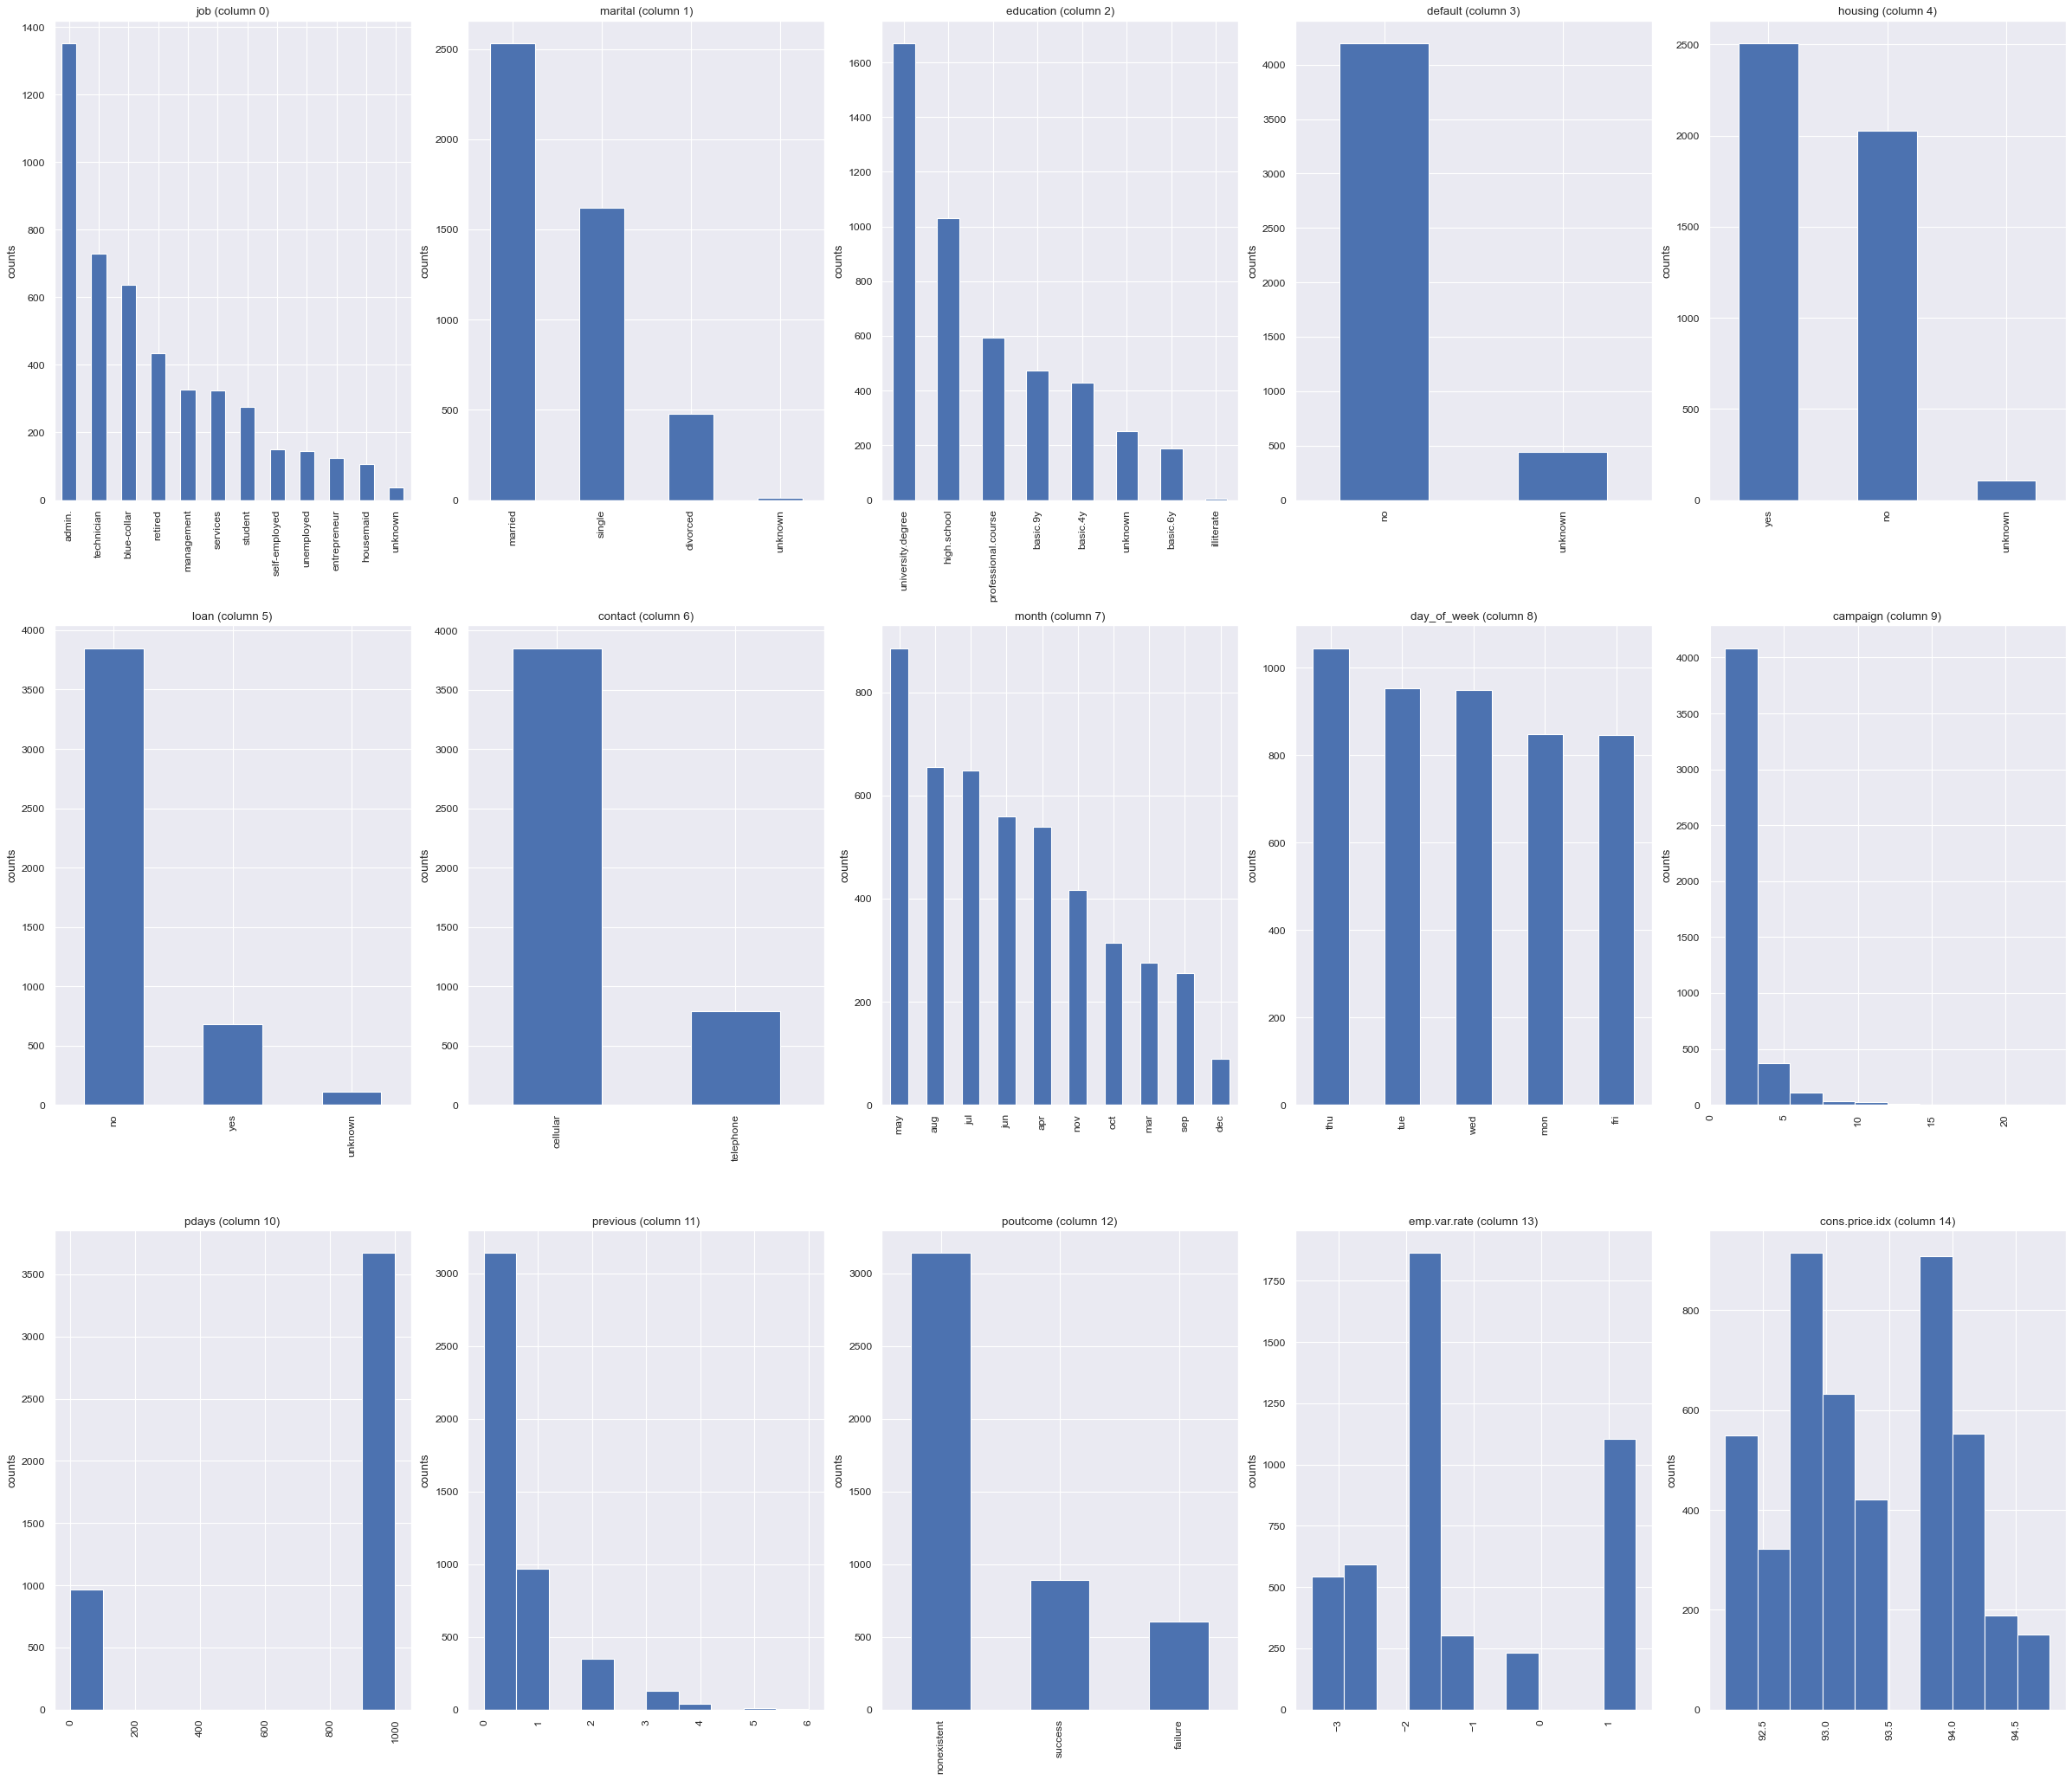

In [20]:
plotPerColumnDistribution(df_cliente_deposito, 15, 5)

Analizamos algunas distribuciones de variables categóricas\
1.- Por estado "marital" : 
        observamos que hay mayor probabilidad de que las personas casadas soliciten un depósito.

In [21]:
df_cliente_deposito.groupby("marital").size().sort_values(ascending=False)

marital
married     2532
single      1620
divorced     476
unknown       12
dtype: int64

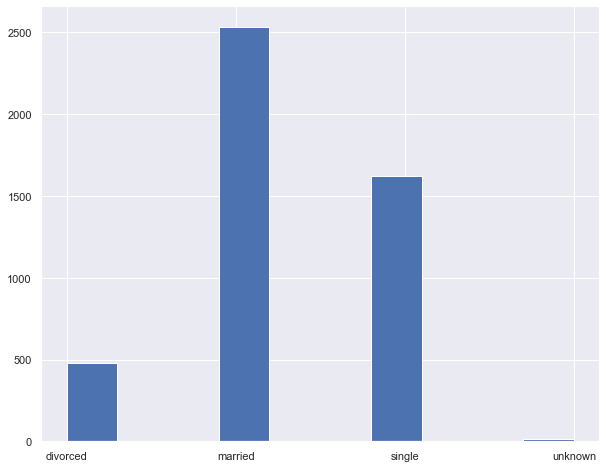

In [22]:
plt.figure(figsize=(10, 8))
plt.hist(df_cliente_deposito["marital"])
plt.show()

2.-  Por Trabajo: 
    observamos mayor probabilidad de solicitar deposito en administrativos, blue-collar, y técnicos
(blue-collar: usado particularmente en países de habla inglesa, para designar a los individuos que forman la parte más baja de la jerarquía de las empresas; en particular con frecuencia señala a ejecutantes de tareas manuales y a obreros)

In [23]:
df_cliente_deposito.groupby("job").size().sort_values(ascending=False)

job
admin.           1352
technician        730
blue-collar       638
retired           434
management        328
services          323
student           275
self-employed     149
unemployed        144
entrepreneur      124
housemaid         106
unknown            37
dtype: int64

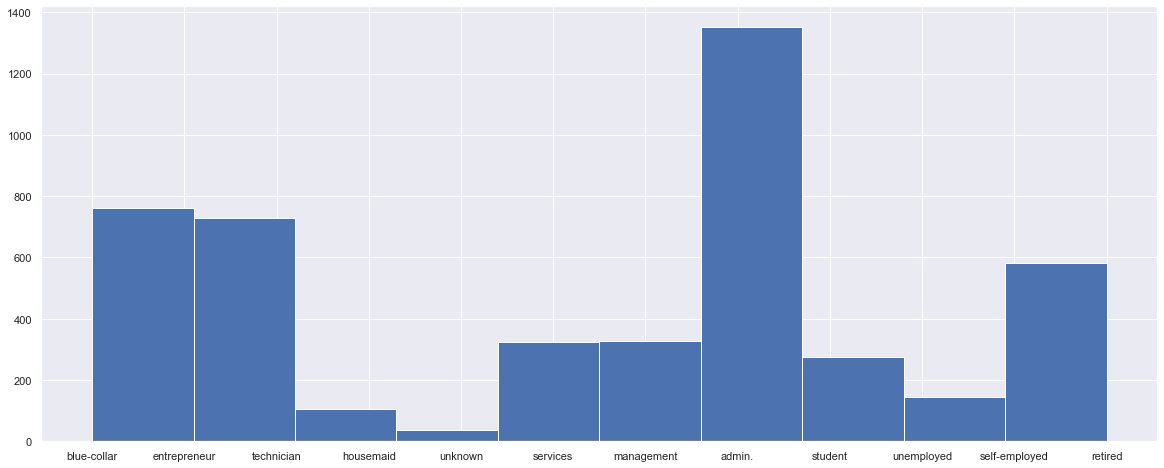

In [24]:
plt.figure(figsize=(20, 8))
plt.hist(df_cliente_deposito["job"])
plt.show()

3.-  Por Educacion: mayor probabilidad de solicitar un deposito los egresados de carreras de grado.

In [25]:
df_cliente_deposito.groupby("education").size().sort_values(ascending=False)

education
university.degree      1670
high.school            1031
professional.course     595
basic.9y                473
basic.4y                428
unknown                 251
basic.6y                188
illiterate                4
dtype: int64

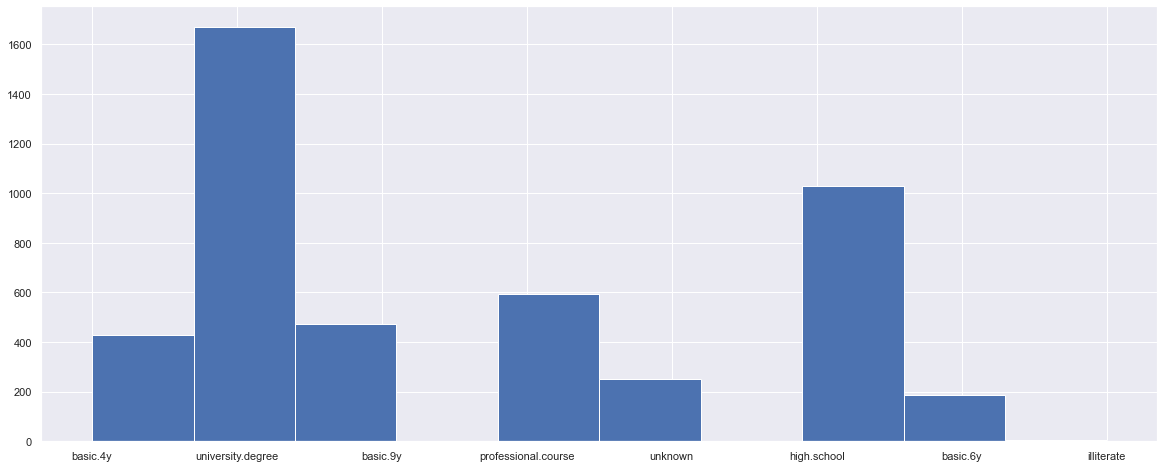

In [26]:
plt.figure(figsize=(20, 8))
plt.hist(df_cliente_deposito["education"])
plt.show()

4.-  Por Loan:
    Tiene mayor probabilidad de solicitar si no posee prestamo personal 

In [27]:
df_cliente_deposito.groupby("loan").size().sort_values(ascending=False)

loan
no         3850
yes         683
unknown     107
dtype: int64

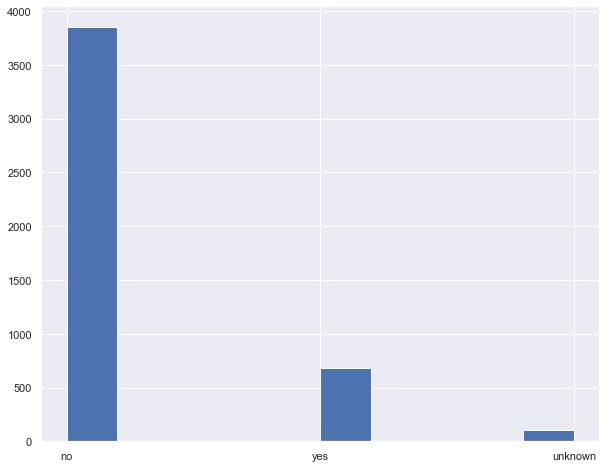

In [28]:
plt.figure(figsize=(10, 8))
plt.hist(df_cliente_deposito["loan"])
plt.show()

Cambio de variables categoricas a binaria

In [29]:
Bank_Full["y"] = np.where(Bank_Full.y == "yes", 1, 0)

In [30]:
df_cliente_deposito.head()

age           job   marital            education  default housing loan  \
75    41   blue-collar  divorced             basic.4y  unknown     yes   no   
83    49  entrepreneur   married    university.degree  unknown     yes   no   
88    49    technician   married             basic.9y       no      no   no   
129   41    technician   married  professional.course  unknown     yes   no   
139   45   blue-collar   married             basic.9y  unknown     yes   no   

       contact month day_of_week  duration  campaign  pdays  previous  \
75   telephone   may         mon      1575         1    999         0   
83   telephone   may         mon      1042         1    999         0   
88   telephone   may         mon      1467         1    999         0   
129  telephone   may         mon       579         1    999         0   
139  telephone   may         mon       461         1    999         0   

        poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
75   nonexistent           1.1          93.994          -36.4      4.857   
83   nonexistent           1.1          93.994          -36.4      4.857   
88   nonexistent           1.1          93.994          -36.4      4.857   
129  nonexistent           1.1          93.994          -36.4      4.857   
139  nonexistent           1.1          93.994          -36.4      4.857   

     nr.employed    y  Adquirieron  Rechazaron  
75        5191.0  yes            1           0  
83        5191.0  yes            1           0  
88        5191.0  yes            1           0  
129       5191.0  yes            1           0  
139       5191.0  yes            1           0

Analizo los casados recibidos o que trabajan como administrativos y no tienen prestamo, como potenciales clientes.

In [31]:
df_ideal = Bank_Full[(Bank_Full.marital == "married") & ((Bank_Full.job == "admin") | (Bank_Full.education == "university.degree")) & (Bank_Full.loan == "no") ]
df_ideal.groupby("y").size().sort_values(ascending=False)


y
0    4567
1     674
dtype: int64

In [32]:
df_peor_caso = Bank_Full[(Bank_Full.marital != "married") & ((Bank_Full.job != "admin") | (Bank_Full.education != "university.degree")) & (Bank_Full.loan != "no") ]
df_peor_caso.groupby("y").size().sort_values(ascending=False)

y
0    2521
1     356
dtype: int64

In [33]:
Bank_Full["student_retired"] = np.where((Bank_Full.job == "retired") | (Bank_Full.job == "student"), 1, 0)

In [34]:
Bank_Full["degree"] = np.where(Bank_Full["education"] =="university.degree",1,0)

In [35]:
Bank_Full["previousProd"] = np.where(Bank_Full.poutcome == "success", 1,0)

In [36]:
Bank_Full["marriedAdmin"] = np.where((Bank_Full.marital == "married") & (Bank_Full.job == "admin"),1,0)

In [37]:
variablesDummies = ["contact", "month", "day_of_week"]
for variable in variablesDummies:
    Bank_Full = Bank_Full.join(pd.get_dummies(Bank_Full[variable], prefix = variable))


In [38]:
Bank_Full["default"] = np.where(Bank_Full.default == "yes",1,0)
Bank_Full["housing"] = np.where(Bank_Full.housing == "yes",1,0)
Bank_Full["loan"] = np.where(Bank_Full.loan == "yes",1,0)


In [40]:
Bank_Full["cuartilesAge"] = pd.qcut(Bank_Full.age,4, labels=False)
Bank_Full["decilesAge"] = pd.qcut(Bank_Full.age,10, labels=False)
Bank_Full["bucketsAge"] = pd.cut(Bank_Full.age, np.array([0,10,20,30,40,50,60,70,80, 90, 100]))

In [41]:
columnsToDrop = ["job" ,"poutcome", "education", "Adquirieron", "Rechazaron", "marital", "contact", "month", "day_of_week",
                "age"]
Bank_Full = Bank_Full.drop(columns = columnsToDrop)

In [43]:
if not os.path.exists("./data/bankMarketing/02 - procesada"):
    os.makedirs("./data/bankMarketing/02 - procesada")

In [44]:
Bank_Full.to_csv("./data/bankMarketing/02 - procesada/bankMarketingTotal.csv", sep=";", index=False)